In [3]:
#importing all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read dataset and convert to dataframe
df=pd.read_csv('employee_dataset.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1.How many are there in each Team and the percentage splitting with respect to the total employees.

2.Segregate the employees w.r.t different positions.

3.Find from which age group most of the employees belong to.

4.Find out under which team and position, spending in terms of salary is high.

5.Find if there is any correlation between age and salary , represent it visually.

Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.


In [5]:
#Checking null values
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
#Checking duplicate values
df.duplicated().sum()

0

In [7]:
#Correct the height column
df['Height'] = np.random.randint(150, 181, size=len(df))
df['Height']

0      155
1      163
2      166
3      166
4      162
      ... 
453    180
454    153
455    159
456    174
457    154
Name: Height, Length: 458, dtype: int32

### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [8]:
team_count=df['Team'].value_counts()
team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [9]:
df['Team'].nunique()

30

In [10]:
team_percentage=team_count/len(df)*100
print(team_percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

### 2.Segregate the employees w.r.t different positions.

In [11]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

### 3.Find from which age group most of the employees belong to.

In [12]:
df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [13]:
age_group_counts = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55]).value_counts()
print("Age group counts:\n", age_group_counts)


Age group counts:
 Age
(25, 35]    235
(17, 25]    200
(35, 45]     23
(45, 55]      0
Name: count, dtype: int64


### 4.Find out under which team and position, spending in terms of salary is high.

In [35]:
high_salary = df.groupby(['Team', 'Position'])['Salary'].sum()
high_salary

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [39]:
high_salary.index

MultiIndex([(     'Atlanta Hawks',  'C'),
            (     'Atlanta Hawks', 'PF'),
            (     'Atlanta Hawks', 'PG'),
            (     'Atlanta Hawks', 'SF'),
            (     'Atlanta Hawks', 'SG'),
            (    'Boston Celtics',  'C'),
            (    'Boston Celtics', 'PF'),
            (    'Boston Celtics', 'PG'),
            (    'Boston Celtics', 'SF'),
            (    'Boston Celtics', 'SG'),
            ...
            (         'Utah Jazz',  'C'),
            (         'Utah Jazz', 'PF'),
            (         'Utah Jazz', 'PG'),
            (         'Utah Jazz', 'SF'),
            (         'Utah Jazz', 'SG'),
            ('Washington Wizards',  'C'),
            ('Washington Wizards', 'PF'),
            ('Washington Wizards', 'PG'),
            ('Washington Wizards', 'SF'),
            ('Washington Wizards', 'SG')],
           names=['Team', 'Position'], length=149)

In [43]:
high_salary.values

array([22756250., 23952268.,  9763400.,  6000000., 10431032.,  7351395.,
       18170960., 19898606.,  6796117.,  6323990., 20636276., 14304819.,
        8747276.,  8840104., 20316720., 14057310., 14328455.,  6331404.,
       23307031., 20848760., 16805037., 22343064.,  3916320., 22870197.,
       20486870., 27882029., 19654777., 23917776., 15047237.,  6996057.,
       12211340., 17672733., 16462102., 17856500.,  4851719., 14049955.,
       10447240., 27982771.,  2790245., 12272091.,  8000000., 17040012.,
       20694400.,  9161760., 19623748., 14550625., 16914511., 18831837.,
       18948276., 23306640.,  7020455.,  6687086., 10145957., 28122883.,
        8000000.,  8259845., 16218770., 22873211., 11400000., 20789602.,
       19966446., 25527217., 14651695., 13919680., 17418624.,  9012090.,
        6473272., 31866445.,  7000000., 19688000., 22178454., 10289328.,
       13743940., 10651158.,   981348., 31538671., 14783000., 13842502.,
       21370152., 18516794.,  8940720., 13661400., 

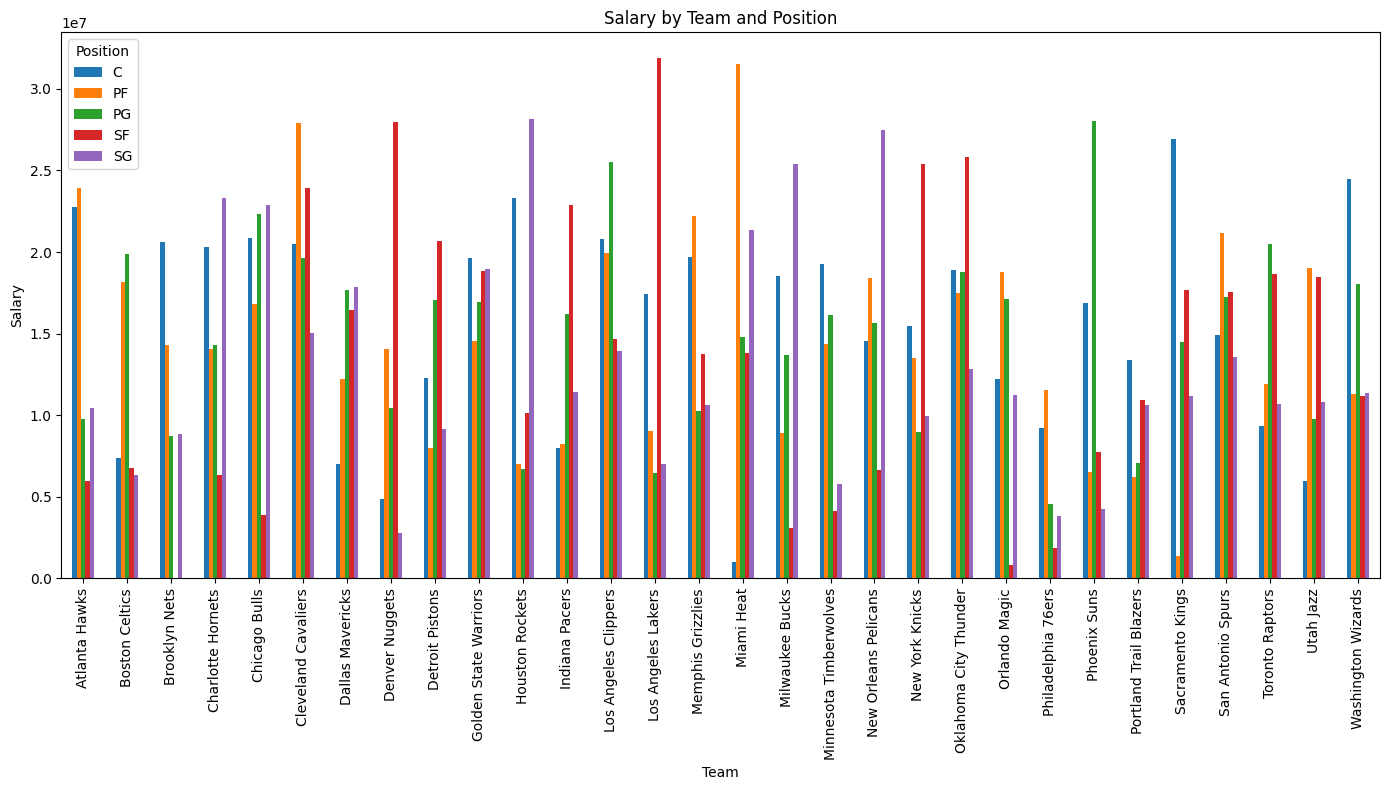

In [53]:
import matplotlib.pyplot as plt

# Assuming 'high_salary' is your MultiIndex Series and 'values' are the associated values
# Replace these variable names with your actual data

# Unstack the MultiIndex Series to create a DataFrame
df = high_salary.unstack()

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8) )
ax.set_xlabel('Team')
ax.set_ylabel('Salary')
ax.set_title('Salary by Team and Position')
plt.legend(title='Position', loc='upper left')
plt.tight_layout()
plt.show()



In [48]:
df = high_salary.unstack()
df

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,22756250.0,23952268.0,9763400.0,6000000.0,10431032.0
Boston Celtics,7351395.0,18170960.0,19898606.0,6796117.0,6323990.0
Brooklyn Nets,20636276.0,14304819.0,8747276.0,NaN,8840104.0
Charlotte Hornets,20316720.0,14057310.0,14328455.0,6331404.0,23307031.0
Chicago Bulls,20848760.0,16805037.0,22343064.0,3916320.0,22870197.0
Cleveland Cavaliers,20486870.0,27882029.0,19654777.0,23917776.0,15047237.0
Dallas Mavericks,6996057.0,12211340.0,17672733.0,16462102.0,17856500.0
Denver Nuggets,4851719.0,14049955.0,10447240.0,27982771.0,2790245.0
Detroit Pistons,12272091.0,8000000.0,17040012.0,20694400.0,9161760.0


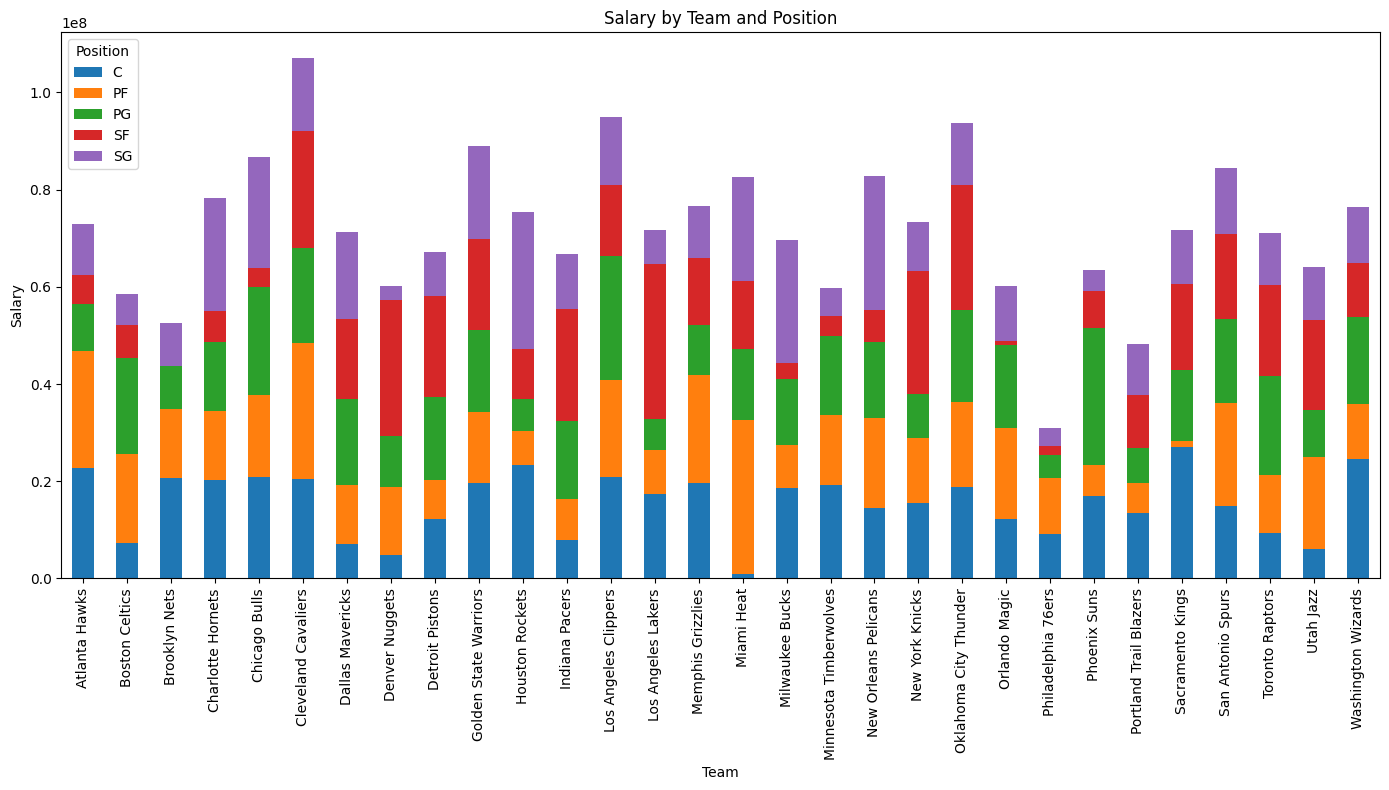

In [54]:
import matplotlib.pyplot as plt

# Assuming 'high_salary' is your MultiIndex Series and 'values' are the associated values
# Replace these variable names with your actual data

# Unstack the MultiIndex Series to create a DataFrame
df = high_salary.unstack()

# Plotting
ax = df.plot(kind='bar', figsize=(14, 8), stacked=True)
ax.set_xlabel('Team')
ax.set_ylabel('Salary')
ax.set_title('Salary by Team and Position')
plt.legend(title='Position', loc='upper left')
plt.tight_layout()
plt.show()


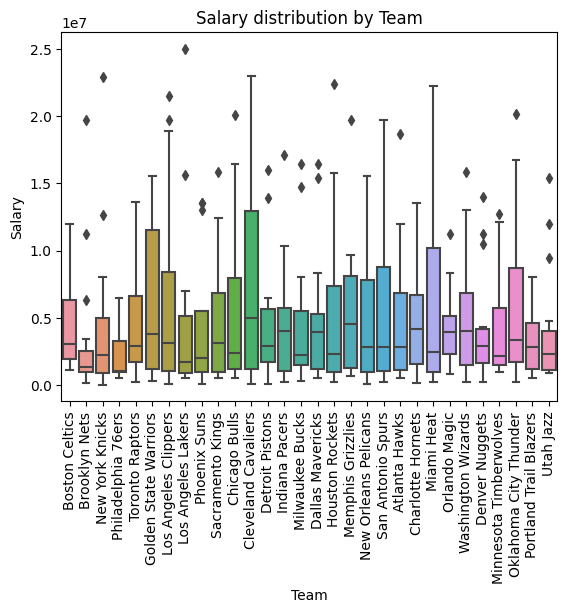

In [15]:
sns.boxplot(x='Team',y='Salary',data=df)
plt.title('Salary distribution by Team')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

* df.groupby(['Team', 'Position']) groups the DataFrame df by the 'Team' and 'Position' columns. This creates a GroupBy object that splits the data into separate groups based on the unique combinations of 'Team' and 'Position'.

* ['Salary'].sum() specifies that we are interested in the 'Salary' column within each group and want to calculate the sum of the values within that column.

* The resulting operation df.groupby(['Team', 'Position'])['Salary'].sum() returns a Series object where the index contains the unique combinations of 'Team' and 'Position', and the values represent the sum of 'Salary' for each combination.

* The high_salary variable stores this Series object containing the summed salary values for each team and position.


In [25]:
team_highest_salary=high_salary.idxmax()
team_highest_salary

('Los Angeles Lakers', 'SF')

In [27]:
hihest_salary_amt=high_salary.max()
hihest_salary_amt

31866445.0

### 5.Find if there is any correlation between age and salary , represent it visually.

In [17]:
df_cleaned=df.dropna()
df_cleaned

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,163,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,166,185,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55,PF,21,156,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,175,238,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
451,Chris Johnson,Utah Jazz,23,SF,26,179,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,175,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,180,203,Butler,2433333.0
456,Jeff Withey,Utah Jazz,24,C,26,174,231,Kansas,947276.0


In [18]:
df_cleaned.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [19]:
#correlation
corr_matrix=df_cleaned[['Age', 'Salary']].corr()
corr_matrix

,Age,Salary
Age,1.000000,0.159992
Salary,0.159992,1.000000


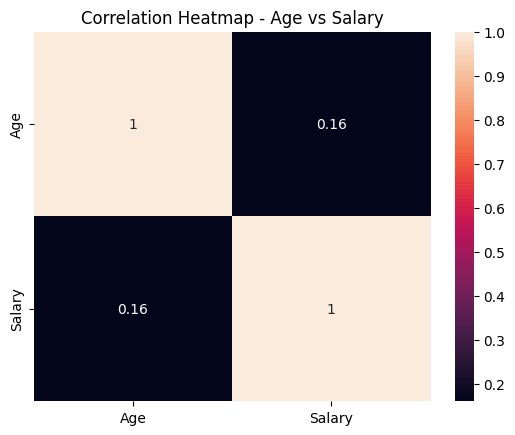

In [20]:
sns.heatmap(corr_matrix,annot=True, cmap='rocket')
plt.title('Correlation Heatmap - Age vs Salary')
plt.show()

In [21]:
corr_matrix1=df_cleaned[['Age', 'Salary']].corr()
corr_matrix1

,Age,Salary
Age,1.000000,0.159992
Salary,0.159992,1.000000


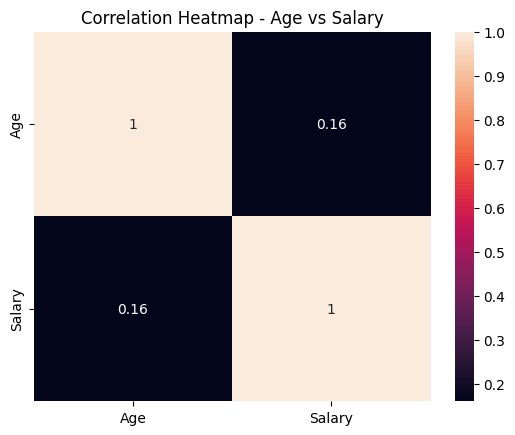

In [22]:
sns.heatmap(corr_matrix1,annot=True, cmap='rocket')
plt.title('Correlation Heatmap - Age vs Salary')
plt.show()